In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 1-Dim Kalman Filter

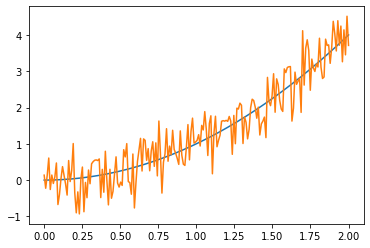

In [28]:
t = np.linspace(0, 2, 200)
# t.shape = (200, 0)

y = t**2
y_1 = y + np.random.normal(0, 0.5, y.shape)

plt.plot(t, y, t, y_1)

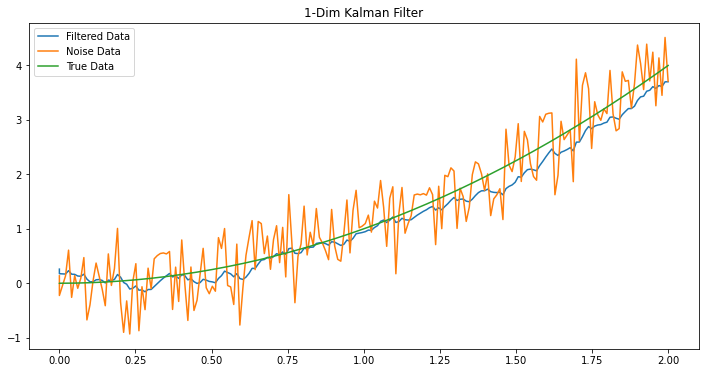

In [114]:
# Kalman Filter
# X(k)=F*X(k-1)+Q Q~N(mu_Q, sigma_Q)
# Y(k)=H*X(k)+R R~N(mu_R, sigma_R)

# 1-dim KF iterative funtion
# x_minus(k) = F * x_plus(k-1)
# P_minus(k) = F**2 * P_plus(k-1) + sigma_Q
# K(k) = P_minus(k) * H / (H * P_minus(k) + sigma_R)
# x_plus(k) = x_minus(k) + K(k) * (y(k) - H * x_minus(k))
# P_plus(k) = (I - K(k) * H) * P_minus(k)

# model:
# Prediction function
# x(k) = x(k-1) + Q ~ N(0, sigma_Q)
# Measurement function
# y(k) = x(k-1) + R ~ N(0, sigma_R)

# 1. 1-dim signal
F = 1
H = 1

sigma_Q = 0.01
sigma_R = 1

# x_minus, x_plus, K, P_minus, P_plus

x0 = np.random.normal(0, 0.1 * 2)

x_plus = np.zeros(t.shape)
x_minus = np.zeros(t.shape)
K = np.zeros(t.shape) # 1 -> len(t)
P_minus = np.zeros(t.shape)
P_plus = np.zeros(t.shape)

y_1;

x_plus[0] = x0
x_minus[0] = x0
P_plus[0] = 0.1 * 2
P_minus[0] = 0.1 * 2

#
# relationship between mu and x
#

# x_minus(k) = F * x_plus(k-1)
# P_minus(k) = F**2 * P_plus(k-1) + sigma_Q
# K(k) = P_minus(k) * H / (H * P_minus(k) + sigma_R)
# x_plus(k) = x_minus(k) + K(k) * (y(k) - H * x_minus(k))
# P_plus(k) = (I - K(k) * H) * P_minus(k)

for k in range(1, len(t)):
    # Prediction step
    x_minus[k] = F * x_plus[k-1]
    P_minus[k] = F**2 * P_plus[k-1] + sigma_Q

    # Measurement step
    K[k] = P_minus[k] * H / (H * P_minus[k] + sigma_R)
    x_plus[k] = x_minus[k] + K[k] * (y_1[k] - H * x_minus[k])
    P_plus[k] = (1 - K[k] * H) * P_minus[k]

plt.figure(figsize=(12, 6))
plt.title('1-Dim Kalman Filter')
plt.plot(t, x_plus, label='Filtered Data')
plt.plot(t, y_1, label='Noise Data')
plt.plot(t, y, label='True Data')
plt.legend()

In [115]:
# Model 2
# X(K)=X(K-1)+X'(K-1)*dt+X''(K-1)*dt^2*(1/2!)+Q2
# Y(K)=X(K)+R

# X(k) = [X(k), X'(k), X''(k)].T
# Y(k) = H * X(k) + R
# H = [1, 0, 0]

# Prediction Function
# X(k) = X(k-1) + X'(k-1) * dt + X''(k-1) * dt^2 * 0.5 + Q1
# X'(k) =         X'(k-1)       + X''(k-1) * dt        + Q2
# X''(k) =                      + X''(k-1)             + Q3


In [116]:
dt = t[3] - t[2]

F = np.array([[1, dt, dt**2 * 0.5], [0, 1, dt], [0, 0, 1]])
H = np.array([[1, 0, 0]])
# F.shape = (3, 3), H.shape = (1, 3)

sigma_Q1 = 1
sigma_Q2 = 0.01
sigma_Q3 = 0.001

sigma_Q = np.array([[sigma_Q1, 0, 0], [0, sigma_Q2, 0], [0, 0, sigma_Q3]])
# sigma_Q3.shape = (3, 3)
R = 1


In [117]:
sigma_Q

array([[1.   , 0.   , 0.   ],
       [0.   , 0.01 , 0.   ],
       [0.   , 0.   , 0.001]])

In [118]:
shape = (3, len(t))
x_minus = np.zeros(shape)
x_plus = np.zeros(shape)
# K = np.zeros(t.shape)

P_plus = np.zeros((3, 3, len(t)))
P_minus = np.zeros((3, 3, len(t)))

initial_x = np.random.normal(0, 0.1 * 2, (3, ))
x_minus[:, 0] = initial_x
x_plus[:, 0] = initial_x
P_plus[..., 0] = np.array([[0.3**2, 0, 0], [0, 0.01**2, 0], [0, 0, 0.001**2]])
P_minus[..., 0] = np.array([[0.3**2, 0, 0], [0, 0.01**2, 0], [0, 0, 0.001**2]])

In [119]:
# x_minus(k) = F * x_plus(k-1)
# P_minus(k) = F * P_plus(k-1) * F.T + Q
# K(k) = P_minus(k) * H.T * inv(H * P_minus(k) * H.T + R)
# x_plus(k) = x_minus(k) + K(k) * (y(k) - H * X_minus(k))
# P_plus(k) = (I - K(k) * H) * P_minus(k)

In [122]:
# for k in range(1, len(t)):
#     x_minus[:, k] = F @ x_plus[:, k-1]
#     P_minus[..., k] = F @ P_plus[..., k-1] @ F.T + sigma_Q
#     K = (P_minus[..., k] @ H.T) @ np.linalg.inv(H @ P_minus[..., k] @ H.T + R)
#     # print(K.shape)
#
#     x_plus[:, k] = x_minus[:, k-1] + K @ (y_1[k] - H @ x_minus[:, k])
#     P_plus[..., k] = (np.identity(3) - K @ H) @ P_minus[..., k]
#     # break
#
# plt.figure(figsize=(12, 6))
# plt.title('Multi-Dim Kalman Filter')
# plt.plot(t, x_plus[0, :], label='Filtered Data')
# plt.plot(t, y_1, label='Noise Data')
# plt.plot(t, y, label='True Data')
# plt.legend()

### Question
1. common multi-dim if F = I ?
2. how sensor fusion work?

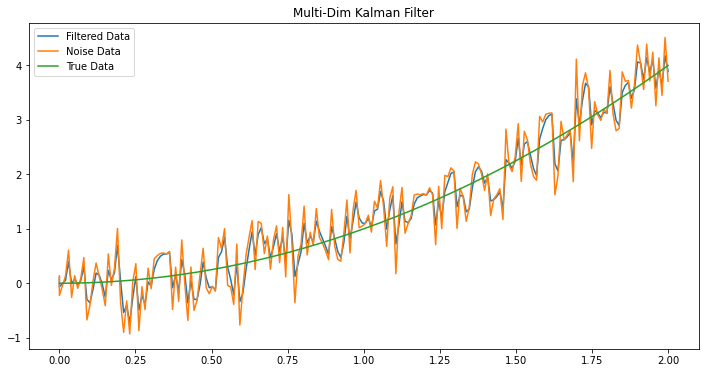

In [121]:
shape = (3, len(t))

x_plus_all = [] # used to sotre the filtered value
P_plus_all = [] # used to store the filtered variance

x_plus = np.random.normal(0, 0.1 * 2, (3,))
P_plus = np.array([[0.3 ** 2, 0, 0], [0, 0.01 ** 2, 0], [0, 0, 0.001 ** 2]])
x_plus_all.append(x_plus)

for k in range(1, len(t)):
    x_minus = F @ x_plus
    P_minus = F @ P_plus @ F.T + sigma_Q
    K = (P_minus @ H.T) @ np.linalg.inv(H @ P_minus @ H.T + R)
    # print(K.shape)

    x_plus= x_minus + K @ (y_1[k] - H @ x_minus)
    P_plus = (np.identity(3) - K @ H) @ P_minus
    x_plus_all.append(x_plus)
    P_plus_all.append(P_minus)
# np.array(x_plus_all).shape
plt.figure(figsize=(12, 6))
plt.title('Multi-Dim Kalman Filter')
plt.plot(t, np.asarray(x_plus_all)[:, 0], label='Filtered Data')
plt.plot(t, y_1, label='Noise Data')
plt.plot(t, y, label='True Data')
plt.legend()